In [180]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow 
import seaborn as sns 
import os 

from glob import glob
from itertools import cycle

import librosa as lr
import librosa.display
import IPython.display as ipd
#import speech_recognition as sr
import serial
import time




sns.set_theme(style="white", palette=None)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [181]:

data_dir='./Audios_training'
audio_files= glob(data_dir + './*wav')
lista=[]

In [182]:
direccion='./Audios_training/'
lista=[]

lista

[]

In [183]:
for file in os.listdir('Audios_training/'):
    print(file)




Andrew_Audios (1).wav
Andrew_Audios (10).wav
Andrew_Audios (11).wav
Andrew_Audios (12).wav
Andrew_Audios (13).wav
Andrew_Audios (14).wav
Andrew_Audios (15).wav
Andrew_Audios (16).wav
Andrew_Audios (17).wav
Andrew_Audios (18).wav
Andrew_Audios (19).wav
Andrew_Audios (2).wav
Andrew_Audios (20).wav
Andrew_Audios (21).wav
Andrew_Audios (22).wav
Andrew_Audios (23).wav
Andrew_Audios (24).wav
Andrew_Audios (25).wav
Andrew_Audios (26).wav
Andrew_Audios (27).wav
Andrew_Audios (28).wav
Andrew_Audios (29).wav
Andrew_Audios (3).wav
Andrew_Audios (30).wav
Andrew_Audios (31).wav
Andrew_Audios (32).wav
Andrew_Audios (33).wav
Andrew_Audios (34).wav
Andrew_Audios (35).wav
Andrew_Audios (36).wav
Andrew_Audios (37).wav
Andrew_Audios (38).wav
Andrew_Audios (39).wav
Andrew_Audios (4).wav
Andrew_Audios (40).wav
Andrew_Audios (41).wav
Andrew_Audios (42).wav
Andrew_Audios (43).wav
Andrew_Audios (44).wav
Andrew_Audios (45).wav
Andrew_Audios (46).wav
Andrew_Audios (47).wav
Andrew_Audios (48).wav
Andrew_Audios (

In [184]:
#ipd.Audio(lista[2])

In [185]:
#Reproducir audio 
ipd.Audio(audio_files[4])

In [186]:
def feature_extraction(lista):

    x, sample_rate= librosa.load(audio_files, res_type="kaiser_fast")
    mfcc= np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc =50).T, axis=0)

    return mfcc 


In [187]:
audio, sqref =lr.load(audio_files[0])
time= np.arange(0,len(audio)) / sqref

time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       2.73337868e+00, 2.73342404e+00, 2.73346939e+00])

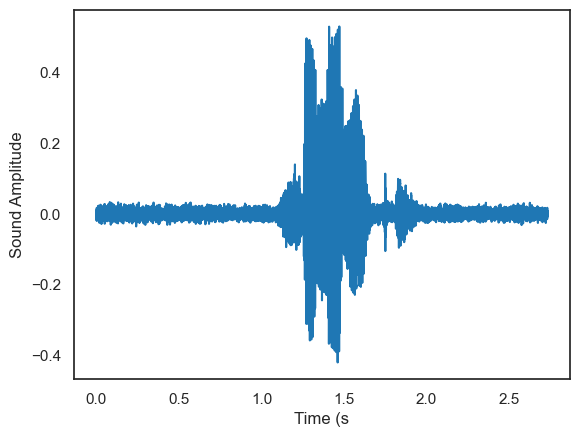

In [188]:
#graficar la onda de audio 
fig,ax = plt.subplots()
ax.plot(time,audio)
ax.set (xlabel='Time (s', ylabel='Sound Amplitude')
plt.show()

In [189]:
#for file in range (0,len(audio_files),1):
  #  audio, sqref=  lr.load(audio_files[file])
   # time= np.arange(0, len(audio))/ sqref



    #fig,ax = plt.subplots()
    #ax.plot(time,audio)
    #ax.set (xlabel='Time (s', ylabel='Sound Amplitude')

    



In [190]:
y, sr=lr.load(audio_files[-1])
print(f'y:{y[:10]}')
print(f'shape.y:{y.shape}')
print(f'sr:{sr}')

y:[-2.6718729e-07  3.1331410e-08 -2.6420253e-08  1.4330958e-06
  3.2640073e-05  9.2986702e-06 -1.4487249e-06 -2.4033001e-05
 -3.2579297e-05 -2.9674873e-05]
shape.y:(53314,)
sr:22050


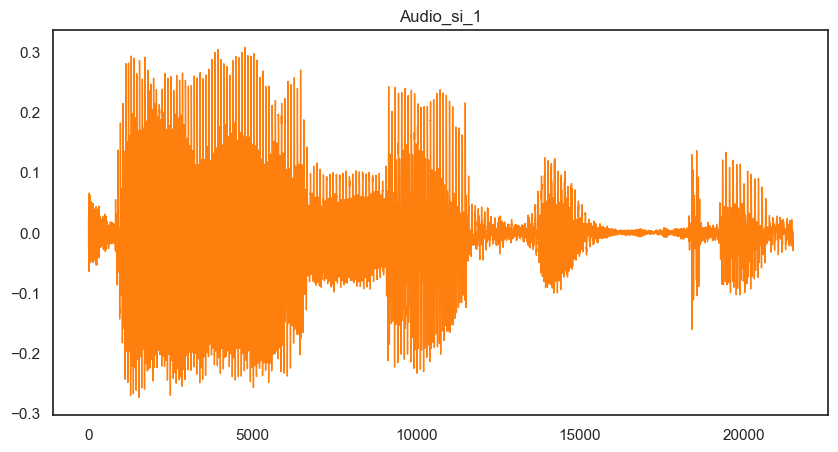

array([-0.0240722 ,  0.00037896,  0.02420285, ..., -0.0086405 ,
       -0.0044291 , -0.00069079], dtype=float32)

In [191]:
y_trimmed, _ =librosa.effects.trim(y, top_db=15)

pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Audio_si_1",color=color_pal[1])
plt.show()
y_trimmed

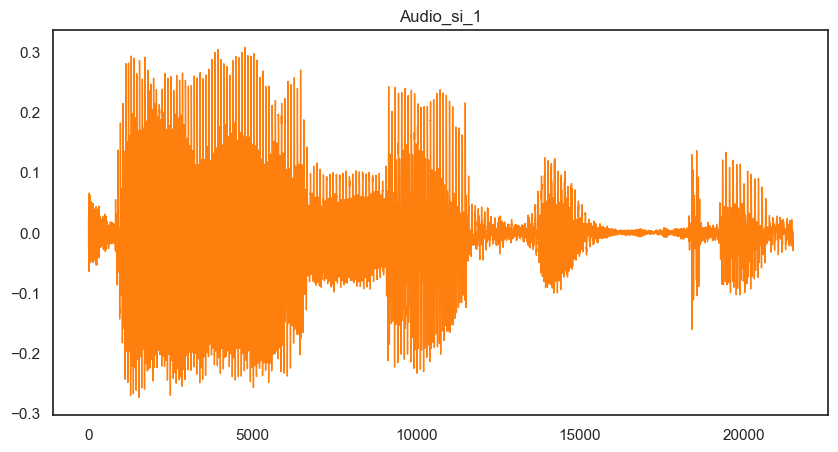

array([-0.0240722 ,  0.00037896,  0.02420285, ..., -0.0086405 ,
       -0.0044291 , -0.00069079], dtype=float32)

In [192]:
y_trimmed, _ =librosa.effects.trim(y, top_db=15)

pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title="Audio_si_1",color=color_pal[1])
plt.show()
y_trimmed

In [193]:
#y_trimmed=y_trimmed.reshape(-1,1)
y_trimmed

array([-0.0240722 ,  0.00037896,  0.02420285, ..., -0.0086405 ,
       -0.0044291 , -0.00069079], dtype=float32)

In [194]:
y_trimmed.shape

(21504,)

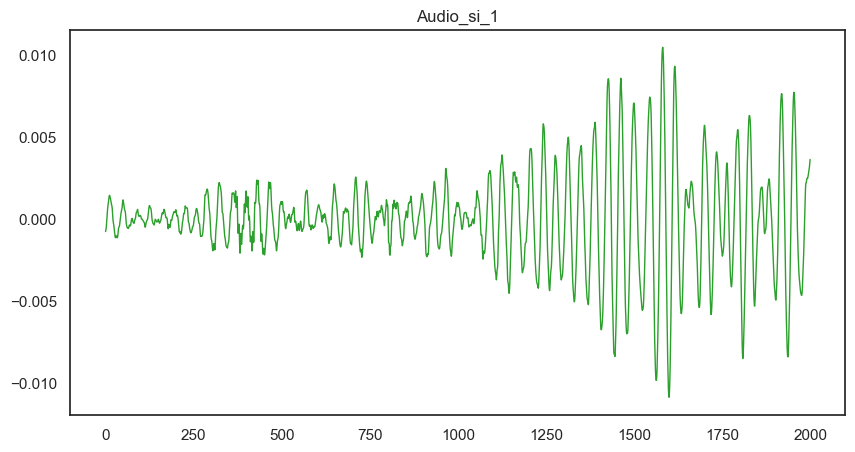

In [195]:
pd.Series(y[2000:4000]).plot(figsize=(10,5), lw=1, title="Audio_si_1",color=color_pal[2])
plt.show()

# Espectograma


In [196]:
D = lr.stft(y)## Short time fourier transform

In [197]:

D=lr.stft(y)
D


array([[-2.2736310e-03+0.0000000e+00j, -3.0424534e-03+0.0000000e+00j,
        -2.1599703e-03+0.0000000e+00j, ...,
        -3.0177603e-03+0.0000000e+00j, -2.9437214e-02+0.0000000e+00j,
        -6.7678273e-02+0.0000000e+00j],
       [ 1.4461983e-03-1.0644622e-03j,  1.6510056e-03+3.4851508e-04j,
         1.4262116e-03+4.8709990e-04j, ...,
        -3.2282183e-03+6.3549164e-03j, -5.7978922e-04-3.2305889e-02j,
         6.5041982e-02-6.0983165e-03j],
       [-6.7980075e-04+7.0407597e-04j, -2.2694770e-04-3.5183379e-04j,
        -1.1827190e-04+6.8039529e-04j, ...,
         1.0889127e-02-7.4634836e-03j,  2.0354118e-02-2.0677201e-03j,
        -5.8529478e-02+1.5428940e-02j],
       ...,
       [ 8.4508802e-06-3.5301665e-07j, -4.1373846e-06+1.7413493e-07j,
         9.5493669e-10+1.6045232e-09j, ...,
        -2.1289191e-08-1.5426311e-09j, -1.8680585e-03-7.7445933e-04j,
         4.5978199e-03+1.9040515e-03j],
       [-8.4509620e-06+1.7687361e-07j,  8.8605489e-08+4.1380836e-06j,
         6.8159439e-10

In [198]:

D = lr.stft(y) ## Shor time fourier transform
S_db= lr.amplitude_to_db(np.abs(D), ref=np.max) ## Amplitud a decibles(usado en tranformadas de audio conmunmente)


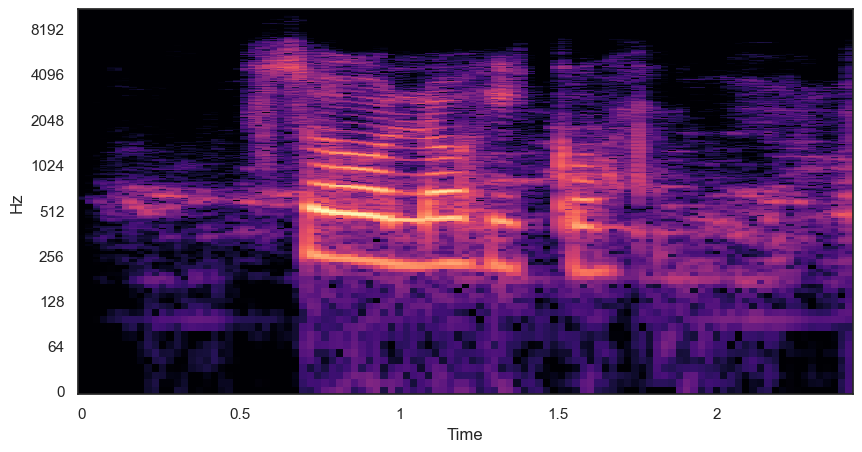

In [199]:
fig,ax = plt.subplots(figsize=(10,5))
img= lr.display.specshow(S_db, x_axis='time',y_axis='log',ax=ax)


In [200]:
s=librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128)
s    ## melodia espectrograma

array([[1.2073102e-07, 9.3155599e-08, 1.6488053e-07, ..., 8.5653292e-06,
        5.6246907e-05, 3.4016161e-04],
       [7.5373613e-08, 9.3444072e-08, 2.4998471e-07, ..., 1.0475517e-05,
        9.6078518e-05, 4.0034298e-04],
       [1.8926436e-07, 1.1197523e-06, 2.1058045e-06, ..., 1.5297021e-04,
        1.8824714e-04, 2.9506464e-04],
       ...,
       [1.3933775e-09, 1.9441784e-09, 2.0670730e-09, ..., 2.7764810e-09,
        3.4322693e-07, 2.0547582e-06],
       [5.6707494e-10, 1.0076466e-09, 1.3720285e-09, ..., 2.2064908e-09,
        4.5134644e-07, 2.6706587e-06],
       [6.9773264e-11, 1.0089977e-10, 1.2455668e-10, ..., 1.0231230e-10,
        4.4377271e-07, 2.6546786e-06]], dtype=float32)

In [201]:

data_dir='./Audios_training'
audio_files= glob(data_dir + './*wav')
lista=[]
  

class AudioDataFixed: 
  def __init__(self):
    self.y = []
    self.d = []
    self.S_db=[]
    self.meanstft=[]
    self.y_trimmed=[]
    self.s=[]
    self.promedio=[]
    self.meany=[]
    self.meand=[]
    self.meanS_db=[]
    self.meany_trimmed=[]
    self.means=[]
    
    

  def getAudioDataFrame(self):
    return {'Y' : self.y, 'Stft': self.meanstft, "Amplitud":self.S_db, "Trimmed":self.y_trimmed, "mel_frequency":self.s}

  def meandataframe(self):
    return{'Y':self.meany,'Stft':self.promedio,"Amplitud":self.meanS_db, "Trimmed":self.meany_trimmed,"mel_frequency":self.means}
   

testAudios = AudioDataFixed()

for i in audio_files:
    #print('i:',i)
    y, sr=lr.load(i,sr=11025,offset=0.0,duration=2.0)                      ## direcion, url, array
    D = lr.stft(y) ## Short time fourier transform
    S_db= lr.amplitude_to_db(np.abs(D), ref=np.max) ## Amplitud a decibles(usado en tranformadas de audio conmunmente)
    s=librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128)
    y_trimmed, _ =librosa.effects.trim(y, top_db=15)
    magnitud=abs(D)
    testAudios.y.append(y)
    testAudios.d.append(D)
    testAudios.S_db.append(S_db)
    testAudios.y_trimmed.append(y_trimmed)
    testAudios.s.append(s)
    testAudios.means.append(np.mean(s))
    testAudios.meany.append(np.mean(y))
    testAudios.meand.append(abs(D))
    testAudios.meanS_db.append(np.mean(S_db))
    testAudios.promedio.append
    testAudios.meany_trimmed.append(np.mean(y_trimmed))
    testAudios.meanstft.append(magnitud)
    testAudios.promedio.append(np.mean(magnitud))
    

    


dfa=pd.DataFrame(testAudios.getAudioDataFrame())
def valor_salida():
  lista=[]
  for i in range(0,151):
    if(i>=100):
      salida=1
      lista.append(salida)
    elif(i<100):
      salida=0
      lista.append(salida)
  return lista

dfb=pd.DataFrame({"Output":valor_salida()})

dfc=pd.DataFrame(testAudios.meandataframe())
dfc

   


,Y,Stft,Amplitud,Trimmed,mel_frequency
0,-5.553704e-05,0.376980,-55.432262,-1.492150e-04,1.233377
1,-1.270887e-04,0.433572,-68.019272,-2.600006e-04,3.574812
2,-7.648442e-05,0.409281,-68.638412,-1.408470e-04,3.114639
3,-2.310965e-05,0.140651,-62.800747,-5.367866e-05,0.241050
4,-3.843501e-05,0.237620,-60.438248,-4.706978e-05,0.618778
...,...,...,...,...,...
154,-4.258522e-05,0.355341,-59.912434,-7.856880e-05,0.959167
155,-9.441345e-07,0.243727,-61.905678,8.051117e-07,0.477455
156,-9.441345e-07,0.243727,-61.905678,8.051117e-07,0.477455
157,1.782586e-05,0.454744,-61.952194,3.576561e-05,1.479815


In [202]:
len(audio_files)

159

In [203]:
len(y_trimmed)

11264

In [204]:
len(y)

22050

In [205]:
len(D)

1025

In [206]:
dfa

,Y,Stft,Amplitud,Trimmed,mel_frequency
0,"[0.0046690623, 0.0044357046, -0.001074688, -0....","[[0.02784728, 0.12339183, 0.10605179, 0.011900...","[[-69.017944, -56.08787, -57.40324, -76.40194,...","[-0.013606885, 0.016991662, -0.03597197, 0.009...","[[0.000473186, 0.0050542005, 0.007431285, 0.02..."
1,"[5.5744833e-05, 0.00025884382, 0.0010104256, 0...","[[0.0022033905, 0.008008386, 0.02170658, 0.052...","[[-80.0, -80.0, -75.73422, -68.04487, -70.4850...","[-0.0004090988, -0.007862594, 0.002970863, 0.0...","[[0.00010714826, 0.0002136391, 0.00014135441, ..."
2,"[0.0018032542, 0.0029538863, 0.0021990729, 0.0...","[[0.0018708111, 0.032920882, 0.049263436, 0.00...","[[-80.0, -72.84449, -69.34342, -80.0, -71.7486...","[-0.02377228, 0.016864106, 0.0024909768, -0.01...","[[4.6985664e-05, 0.00015626865, 0.00018140947,..."
3,"[-2.8970542e-05, -0.00015870525, -0.0002357625...","[[0.006763408, 0.019208463, 0.026508095, 0.046...","[[-73.47409, -64.40755, -61.609833, -56.65458,...","[0.0005127962, 0.0017684689, 0.01224918, -0.01...","[[9.880923e-05, 0.00027816536, 0.0006944389, 0..."
4,"[-5.338339e-05, -0.0001733475, -0.00019543545,...","[[0.007484357, 0.020682042, 0.036420427, 0.026...","[[-75.13397, -66.30519, -61.390167, -64.18467,...","[-0.0057573738, -0.0026131067, 0.0038423538, 0...","[[1.3359989e-05, 0.00014132145, 0.0010214526, ..."
...,...,...,...,...,...
154,"[8.73261e-06, -2.2172298e-05, -8.935749e-06, 1...","[[0.00038194912, 0.009614048, 0.022205645, 0.0...","[[-80.0, -76.34523, -69.07409, -72.057434, -80...","[-0.0035580294, 0.016414953, -0.025206767, 0.0...","[[5.7391804e-07, 1.1696888e-05, 3.7424805e-05,..."
155,"[1.11048585e-05, 3.3061697e-05, -4.8588745e-06...","[[0.0019112937, 0.0038086378, 0.0029530462, 0....","[[-80.0, -79.211716, -80.0, -78.275764, -75.47...","[0.0010029271, 0.0010372547, 0.0015228803, 0.0...","[[8.879195e-08, 2.2464471e-07, 2.869319e-07, 7..."
156,"[1.11048585e-05, 3.3061697e-05, -4.8588745e-06...","[[0.0019112937, 0.0038086378, 0.0029530462, 0....","[[-80.0, -79.211716, -80.0, -78.275764, -75.47...","[0.0010029271, 0.0010372547, 0.0015228803, 0.0...","[[8.879195e-08, 2.2464471e-07, 2.869319e-07, 7..."
157,"[-9.677473e-07, 1.0542545e-06, -1.176362e-06, ...","[[0.00025444388, 0.0012223868, 0.0018809084, 0...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -76.01755...","[-0.015826039, 0.0064215274, -0.009476, 0.0049...","[[2.5968916e-07, 1.8562321e-06, 2.2120146e-06,..."


In [207]:
print(type(y))

<class 'numpy.ndarray'>


In [208]:
b=[]
for i in range(0,159):
    if (i<51):
        salida=1
        b.append(salida)
    elif(i>=51):
        salida=0
        b.append(salida)

In [209]:
b

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [210]:
output= b
dfc["Output"]= output


In [211]:
dfc

,Y,Stft,Amplitud,Trimmed,mel_frequency,Output
0,-5.553704e-05,0.376980,-55.432262,-1.492150e-04,1.233377,1
1,-1.270887e-04,0.433572,-68.019272,-2.600006e-04,3.574812,1
2,-7.648442e-05,0.409281,-68.638412,-1.408470e-04,3.114639,1
3,-2.310965e-05,0.140651,-62.800747,-5.367866e-05,0.241050,1
4,-3.843501e-05,0.237620,-60.438248,-4.706978e-05,0.618778,1
...,...,...,...,...,...,...
154,-4.258522e-05,0.355341,-59.912434,-7.856880e-05,0.959167,0
155,-9.441345e-07,0.243727,-61.905678,8.051117e-07,0.477455,0
156,-9.441345e-07,0.243727,-61.905678,8.051117e-07,0.477455,0
157,1.782586e-05,0.454744,-61.952194,3.576561e-05,1.479815,0


In [212]:
x=dfc.iloc[:,0:5].values


In [213]:
dfc.head(60)

,Y,Stft,Amplitud,Trimmed,mel_frequency,Output
0,-5.553704e-05,0.376980,-55.432262,-1.492150e-04,1.233377,1
1,-1.270887e-04,0.433572,-68.019272,-2.600006e-04,3.574812,1
2,-7.648442e-05,0.409281,-68.638412,-1.408470e-04,3.114639,1
3,-2.310965e-05,0.140651,-62.800747,-5.367866e-05,0.241050,1
4,-3.843501e-05,0.237620,-60.438248,-4.706978e-05,0.618778,1
5,2.513057e-05,0.155139,-63.209946,7.377100e-05,0.382917,1
6,-8.592255e-05,0.196664,-59.143970,-2.099624e-04,0.369445,1
7,-3.749360e-05,0.116350,-63.703045,-8.444635e-05,0.168921,1
8,-4.530160e-05,0.170267,-64.197990,-9.282772e-05,0.398517,1
9,-3.052274e-05,0.117292,-63.322186,-6.419359e-05,0.225974,1


In [214]:
y=dfc.iloc[:,5].values

In [215]:
max(y)

1

In [216]:
x.shape

(159, 5)

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =1 )

In [220]:
x_train.shape

(119, 5)

In [221]:
y_train

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [222]:
x_test  

array([[-7.38297895e-05,  4.81864035e-01, -5.47731171e+01,
        -4.33444620e-05,  1.36898232e+00],
       [-4.48465034e-05,  1.24682285e-01, -6.03866577e+01,
        -7.43336859e-05,  1.75250903e-01],
       [-2.99039075e-05,  3.41864467e-01, -6.71763611e+01,
        -3.42785352e-05,  2.28861642e+00],
       [ 6.25102666e-06,  1.65499181e-01, -5.53046074e+01,
         2.53763665e-05,  1.57146096e-01],
       [ 1.90506089e-05,  1.57748863e-01, -5.69413033e+01,
        -8.96406561e-07,  1.74196258e-01],
       [-2.99537205e-05,  2.18166053e-01, -6.46089554e+01,
        -6.72040187e-07,  5.47298074e-01],
       [-3.57515783e-05,  4.80871558e-01, -6.49196243e+01,
        -5.16629298e-05,  3.13705277e+00],
       [-1.97965710e-05,  4.49570447e-01, -6.50115814e+01,
        -4.05524588e-05,  2.93512273e+00],
       [-1.21664038e-04,  2.16101825e-01, -6.02794456e+01,
        -1.98236128e-04,  4.26174670e-01],
       [ 3.01098025e-05,  1.98132351e-01, -5.34592934e+01,
        -2.37092554e-05

In [223]:
sc=StandardScaler()

sc.fit(x_train)
x_train_std=sc.transform(x_train)
x__test_std=sc.transform(x_test)

In [224]:
x_train.shape

(119, 5)

In [225]:
y_train.shape

(119,)

In [226]:
from keras import utils

nclasses = 2
Y_train = utils.to_categorical(y_train,nclasses)
Y_test = utils.to_categorical(y_test,nclasses)

In [227]:
input_dim = x_train.shape[1]
output_dim = Y_train.shape[1]

In [228]:
input_dim

5

In [229]:
output_dim

2

In [230]:
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Flatten, Dense 

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [231]:
model_optimizer = Sequential()
model_optimizer.add( Dense(120, input_dim=input_dim, activation='relu'))
model_optimizer.add(Dense(70, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"))
model_optimizer.add(tf.keras.layers.Dropout(0.2))



model_optimizer.add(Dense(output_dim, activation = "softmax"))

c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [232]:
model_optimizer.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [233]:
history=model_optimizer.fit(x_train, Y_train,validation_split=0.3, epochs=50) #Modificacion para incluir grupo de validación <> test

Epoch 1/50


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.5162 - loss: 1.8233 - val_accuracy: 0.7222 - val_loss: 0.6211
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5864 - loss: 1.3277 - val_accuracy: 0.7222 - val_loss: 1.1838
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7024 - loss: 1.7027 - val_accuracy: 0.7222 - val_loss: 0.9285
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5250 - loss: 1.9375 - val_accuracy: 0.7222 - val_loss: 0.6146
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4591 - loss: 1.3441 - val_accuracy: 0.2778 - val_loss: 0.7752
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3923 - loss: 1.8214 - val_accuracy: 0.7222 - val_loss: 0.5800
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5803 - loss: 1.4435 - val_accuracy: 0.7222 - val_loss: 0.7038
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5527 - loss: 1.1238 - val_accuracy: 0.7222 - val_loss: 0.5957
Epoch 9/50

In [234]:
resul=model_optimizer.evaluate(x_test,Y_test)
resul

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6854 - loss: 0.5487


[0.5195549726486206, 0.699999988079071]

In [235]:
Y_pred=model_optimizer.predict(x_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [236]:
# serializa el modelo para JSON
#model_json = model_optimizer.to_json()
#with open("model.json", "w") as json_file:
 # json_file.write(model_json)
#serializan los pesos (weights) para HDF5
#model_optimizer.save_weights("model.h5")

In [237]:
from tensorflow.keras.models import model_from_json 

In [238]:
# carga el json y crea el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test
loaded_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
score = loaded_model.evaluate(x_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Modelo cargado desde el PC
compile_metrics: 67.50%


In [239]:
x_test.shape

(40, 5)

In [240]:
loaded_model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.6046071 , 0.39539286],
       [0.6581429 , 0.34185708],
       [0.61833787, 0.38166213],
       [0.6463048 , 0.35369515],
       [0.649785  , 0.350215  ],
       [0.65658754, 0.34341243],
       [0.5817    , 0.41829997],
       [0.5896503 , 0.41034973],
       [0.6498867 , 0.35011327],
       [0.6405261 , 0.35947388],
       [0.64457196, 0.35542804],
       [0.6443032 , 0.3556968 ],
       [0.6426809 , 0.35731912],
       [0.6697549 , 0.33024514],
       [0.64388704, 0.356113  ],
       [0.64198345, 0.35801655],
       [0.64633244, 0.3536676 ],
       [0.64521295, 0.35478702],
       [0.6591815 , 0.3408185 ],
       [0.6415381 , 0.3584619 ],
       [0.6149684 , 0.38503167],
       [0.599116  , 0.400884  ],
       [0.642012  , 0.35798797],
       [0.6583273 , 0.3416727 ],
       [0.64530647, 0.3546935 ],
       [0.6357726 , 0.3642274 ],
       [0.6396217 , 0.36037835],
       [0.5969142 , 0.4030858 ],
       [0.5896503 , 0.41034973],
       [0.64738125, 0.35261875],
       [0.

In [241]:
modelo=LogisticRegression(max_iter=500)
modelo.fit
modelo.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [242]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [243]:
x_test.shape

(40, 5)

In [244]:
type(x_train)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [245]:
y_pred = modelo.predict(x__test_std)
print('Misclassified samples:' , (y_test != y_pred).sum())

Misclassified samples: 13


In [246]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [247]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.675

# Entrada de audio


In [248]:
import pyaudio
import wave
#hola
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Inicio grabación...")

frames=[]
seconds = 3
for i in range(0, int(RATE/CHUNK * seconds)):
    data = stream.read(CHUNK)
    frames.append(data)
    
print("Fin de grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("entrada3.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

Inicio grabación...
Fin de grabación


In [249]:
archivoEntrada="entrada3.wav"
archivoEntrada

'entrada3.wav'

In [250]:
data_dir='./Audios_test'
audio_files= glob(data_dir + './*wav')
lista=[]
audio_files

['./Audios_test.\\entrada3.wav', './Audios_test.\\entrada34.wav']

In [251]:
for file in os.listdir('Audios_test/'):
    print(file)

entrada3.wav
entrada34.wav


In [252]:
data_dir='./Audios_test'
audio_files= glob(data_dir + './*wav')
lista=[]
  

class AudioDataFixed: 
  def __init__(self):
    self.y = []
    self.d = []
    self.S_db=[]
    self.meanstft=[]
    self.y_trimmed=[]
    self.s=[]
    self.promedio=[]
    self.meany=[]
    self.meand=[]
    self.meanS_db=[]
    self.meany_trimmed=[]
    self.means=[]
    
    

  def getAudioDataFrame(self):
    return {'Y' : self.y, 'Stft': self.meanstft, "Amplitud":self.S_db, "Trimmed":self.y_trimmed, "mel_frequency":self.s}

  def meandataframe(self):
    return{'Y':self.meany,'Stft':self.promedio,"Amplitud":self.meanS_db, "Trimmed":self.meany_trimmed,"mel_frequency":self.means}
   

testAudios = AudioDataFixed()

for i in audio_files:
    #print('i:',i)
    y, sr=lr.load(i,sr=11025,offset=0.0,duration=2.0)                      ## direcion, url, array
    D = lr.stft(y) ## Short time fourier transform
    S_db= lr.amplitude_to_db(np.abs(D), ref=np.max) ## Amplitud a decibles(usado en tranformadas de audio conmunmente)
    s=librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128)
    y_trimmed, _ =librosa.effects.trim(y, top_db=15)
    magnitud=abs(D)
    testAudios.y.append(y)
    testAudios.d.append(D)
    testAudios.S_db.append(S_db)
    testAudios.y_trimmed.append(y_trimmed)
    testAudios.s.append(s)
    testAudios.means.append(np.mean(s))
    testAudios.meany.append(np.mean(y))
    testAudios.meand.append(abs(D))
    testAudios.meanS_db.append(np.mean(S_db))
    testAudios.promedio.append
    testAudios.meany_trimmed.append(np.mean(y_trimmed))
    testAudios.meanstft.append(magnitud)
    testAudios.promedio.append(np.mean(magnitud))
    

    


df=pd.DataFrame(testAudios.getAudioDataFrame())
def valor_salida():
  lista=[]
  for i in range(0,151):
    if(i>=100):
      salida=1
      lista.append(salida)
    elif(i<100):
      salida=0
      lista.append(salida)
  return lista

dfb=pd.DataFrame({"Output":valor_salida()})

dfmean=pd.DataFrame(testAudios.meandataframe())
dfmean

,Y,Stft,Amplitud,Trimmed,mel_frequency
0,0.000006,0.568821,-65.751999,0.000091,2.559996
1,-0.000002,0.266967,-69.289093,-0.000011,0.915537


In [253]:
xmean=dfmean.iloc[:,0:5].values
xmean

array([[ 5.7871584e-06,  5.6882066e-01, -6.5751999e+01,  9.0831098e-05,
         2.5599961e+00],
       [-1.7938376e-06,  2.6696691e-01, -6.9289093e+01, -1.0994011e-05,
         9.1553748e-01]], dtype=float32)

In [254]:
from tensorflow.keras.models import model_from_json 
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Flatten, Dense 


In [255]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# se cargan los pesos (weights) en el nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado desde el PC")
# se evalua el modelo cargado con los datos de los test
loaded_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
score = loaded_model.evaluate(x_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Modelo cargado desde el PC
compile_metrics: 67.50%


In [256]:
entrada_x=loaded_model.predict(xmean)
entrada_x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.606779  , 0.39322096],
       [0.6560794 , 0.34392053]], dtype=float32)

In [257]:
valor_final=entrada_x[0][1]
valor_final

0.39322096

In [258]:
salida_USB=0
if (valor_final>=0.50):
    salida_USB=1
else:
    salida_USB=0

In [259]:
salida_USB

0